In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("/Users/pallavi385/Downloads/pml-training.csv",index_col=0)

In [5]:
data.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,3,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,3,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,3,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,3,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [27]:
data.shape

(19622, 159)

In [12]:
data.columns

Index(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2',
       'cvtd_timestamp', 'new_window', 'num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt', 'total_accel_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=159)

In [13]:
data.user_name.value_counts()

adelmo      3892
charles     3536
jeremy      3402
carlitos    3112
eurico      3070
pedro       2610
Name: user_name, dtype: int64

In [17]:
data.classe.value_counts()

A    5580
B    3797
E    3607
C    3422
D    3216
Name: classe, dtype: int64

In [18]:
data.new_window.value_counts()

no     19216
yes      406
Name: new_window, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19622 entries, 1 to 19622
Columns: 159 entries, user_name to classe
dtypes: float64(94), int64(28), object(37)
memory usage: 24.0+ MB


In [20]:
type(data.cvtd_timestamp)

pandas.core.series.Series

In [24]:
#categorical objects
data.describe(include='object')

,user_name,cvtd_timestamp,new_window,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_yaw_belt,...,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_yaw_forearm,min_yaw_forearm,amplitude_yaw_forearm,classe
count,19622,19622,19622,406,406,406,406,406,406,406,...,406,406,406,406,406,406,406,406,406,19622
unique,6,20,2,396,316,1,394,337,1,91,...,321,322,1,322,318,1,44,44,2,5
top,adelmo,28/11/2011 14:14,no,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,-1.1,...,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,#DIV/0!,0.00,A
freq,3892,1498,19216,10,32,406,9,32,406,23,...,84,85,406,83,85,406,84,84,322,5580


In [23]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
raw_timestamp_part_1,19622.0,1.322827e+09,204927.679809,1.322490e+09,1.322673e+09,1.322833e+09,1.323084e+09,1.323095e+09
raw_timestamp_part_2,19622.0,5.006561e+05,288222.879958,2.940000e+02,2.529122e+05,4.963800e+05,7.518908e+05,9.988010e+05
num_window,19622.0,4.306400e+02,247.909554,1.000000e+00,2.220000e+02,4.240000e+02,6.440000e+02,8.640000e+02
roll_belt,19622.0,6.440720e+01,62.750255,-2.890000e+01,1.100000e+00,1.130000e+02,1.230000e+02,1.620000e+02
pitch_belt,19622.0,3.052828e-01,22.351242,-5.580000e+01,1.760000e+00,5.280000e+00,1.490000e+01,6.030000e+01
yaw_belt,19622.0,-1.120506e+01,95.193926,-1.800000e+02,-8.830000e+01,-1.300000e+01,1.290000e+01,1.790000e+02
total_accel_belt,19622.0,1.131261e+01,7.742309,0.000000e+00,3.000000e+00,1.700000e+01,1.800000e+01,2.900000e+01
max_roll_belt,406.0,-6.667241e+00,94.594252,-9.430000e+01,-8.800000e+01,-5.100000e+00,1.850000e+01,1.800000e+02
max_picth_belt,406.0,1.292365e+01,8.005960,3.000000e+00,5.000000e+00,1.800000e+01,1.900000e+01,3.000000e+01
min_roll_belt,406.0,-1.043645e+01,93.616774,-1.800000e+02,-8.840000e+01,-7.850000e+00,9.050000e+00,1.730000e+02


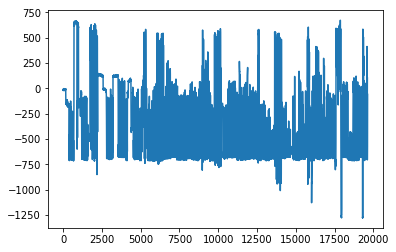

In [29]:
data.magnet_forearm_x.plot()

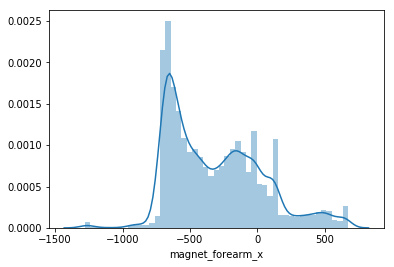

In [38]:
sns.distplot(data.magnet_forearm_x)

In [32]:
data=data.dropna(axis=1)

In [33]:
data.shape

(19622, 59)

In [41]:
data.columns

Index(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2',
       'cvtd_timestamp', 'new_window', 'num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt', 'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y',
       'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z',
       'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 'roll_arm',
       'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z',
       'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',
       'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z',
       'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'ac

In [42]:
data.isna().sum()

user_name               0
raw_timestamp_part_1    0
raw_timestamp_part_2    0
cvtd_timestamp          0
new_window              0
num_window              0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbe

In [44]:
train_data=data.drop(['user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp'],axis=1)

In [47]:
train_data.shape

(19622, 55)

In [52]:
train_data.head()

,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
1,no,11,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
2,no,11,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
3,no,11,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
4,no,12,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
5,no,12,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [ ]:
train_data=train_data.drop('new_window',axis=1)

In [108]:
train_data.shape

(19622, 54)

In [80]:
X=train_data.iloc[:,0:53].values
y=train_data.iloc[:,53]

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
y

1        A
2        A
3        A
4        A
5        A
6        A
7        A
8        A
9        A
10       A
11       A
12       A
13       A
14       A
15       A
16       A
17       A
18       A
19       A
20       A
21       A
22       A
23       A
24       A
25       A
26       A
27       A
28       A
29       A
30       A
        ..
19593    E
19594    E
19595    E
19596    E
19597    E
19598    E
19599    E
19600    E
19601    E
19602    E
19603    E
19604    E
19605    E
19606    E
19607    E
19608    E
19609    E
19610    E
19611    E
19612    E
19613    E
19614    E
19615    E
19616    E
19617    E
19618    E
19619    E
19620    E
19621    E
19622    E
Name: classe, Length: 19622, dtype: object

In [83]:
train_data.describe(include='object')

,classe
count,19622
unique,5
top,A
freq,5580


In [87]:
train_data.columns

Index(['num_window', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
      

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

/Users/pallavi385/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pallavi385/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
print("Test Accuracy {:.2f}%".format(lr.score(X_test,y_test)*100))

Test Accuracy 73.91%


In [91]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

/Users/pallavi385/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [92]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(X_test,y_test)*100))

Test Accuracy of SVM Algorithm: 27.54%


In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))

Decision Tree Test Accuracy 98.01%


In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 99.87%


In [96]:
methods = ["Logistic Regression","SVM","Decision Tree", "Random Forest"]
accuracy = [73.91, 27.54, 98.01,99.87]
colors = ["purple","magenta","#CFC60E","#0FBBAE"]

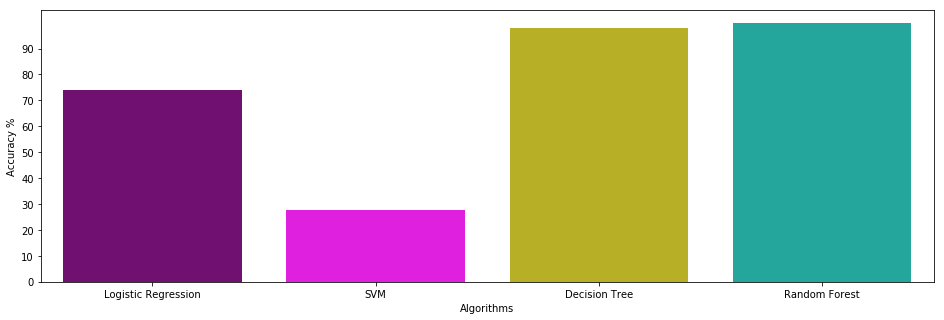

In [97]:
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

In [ ]:
        ###### Predictions #######

In [99]:
data_test=pd.read_csv("/Users/pallavi385/Downloads/pml-testing.csv",index_col=0)

In [100]:
data_test.shape

(20, 159)

In [101]:
data_test=data_test.dropna(axis=1)

In [102]:
data_test.shape

(20, 59)

In [103]:
data_test.columns

Index(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2',
       'cvtd_timestamp', 'new_window', 'num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt', 'total_accel_belt', 'gyros_belt_x', 'gyros_belt_y',
       'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z',
       'magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 'roll_arm',
       'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z',
       'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',
       'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z',
       'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'ac

In [110]:
#data_test.drop(['user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp','new_window'],axis=1)

In [113]:
data_test=data_test.drop('problem_id',axis=1)

In [114]:
data_test.shape

(20, 53)

In [115]:
data_test=data_test.values

In [116]:
y_predict=rf.predict(data_test)

In [117]:
y_predict

array(['B', 'A', 'B', 'A', 'A', 'E', 'D', 'B', 'A', 'A', 'B', 'C', 'B',
       'A', 'E', 'E', 'A', 'B', 'B', 'B'], dtype=object)